## Czyszczenie danych

#### Interesują nas tylko wyścigi od 1991 roku (ze względu na zaszumienia np. wyścigi powyżej 200 okrążeń i by uwzględnić całą karierę Michaela Schumachera)

![query1](query1.png)

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
db_name = 'f1.db'
connection = sqlite3.connect(db_name)

# Query the data from the table
query = "SELECT ra.name, ra.year, d.forename || ' ' || d.surname AS driver_name, c.name, re.positionOrder, re.laps, s.status FROM results re INNER JOIN races ra ON ra.raceId = re.raceId INNER JOIN drivers d ON d.driverId = re.driverId INNER JOIN constructors c ON c.constructorId = re.constructorId INNER JOIN status s ON s.statusId = re.statusId"
result = connection.execute(query).fetchall()

# Get column names from the cursor description
columns = ["race_name", "race_year", "driver_name", "constructor_name", "driver_final_position", "laps_driven", "ending"]

# Create a DataFrame
df = pd.DataFrame(result, columns=columns)

# Close the connection
connection.close()

# Print the DataFrame
print(df)

                   race_name  race_year        driver_name constructor_name  \
0      Australian Grand Prix       2008     Lewis Hamilton          McLaren   
1      Australian Grand Prix       2008      Nick Heidfeld       BMW Sauber   
2      Australian Grand Prix       2008       Nico Rosberg         Williams   
3      Australian Grand Prix       2008    Fernando Alonso          Renault   
4      Australian Grand Prix       2008  Heikki Kovalainen          McLaren   
...                      ...        ...                ...              ...   
11674     Belgian Grand Prix       2023   Daniel Ricciardo       AlphaTauri   
11675     Belgian Grand Prix       2023     Logan Sargeant         Williams   
11676     Belgian Grand Prix       2023   Nico HĂĽlkenberg     Haas F1 Team   
11677     Belgian Grand Prix       2023       Carlos Sainz          Ferrari   
11678     Belgian Grand Prix       2023      Oscar Piastri          McLaren   

       driver_final_position  laps_driven          

ValueError: could not convert string to float: 'Australian Grand Prix'

## Średnia

In [2]:
def mean(values):
    mean = 0
    for value in values:
        mean += value
    mean /= len(values)
    return mean

## Mediana

In [12]:
def median(values):
    n = len(values)
    if n % 2 == 1:
        return values[n // 2 + 1]
    else:
        return (values[n // 2] + values[n // 2 + 1]) / 2

## Rozstęp

In [21]:
def sample_range(values):
    n = len(values)
    return values.iloc[n-1] - values.iloc[0]

## Wariancja

In [5]:
def variance(values):
    n = len(values)
    m = mean(values)
    variance = 0
    for value in values:
        variance += (value - m) ** 2
    variance /= (n - 1)
    return variance

## Średnie odchylenie

In [6]:
def average_deviation(values):
    n = len(values)
    deviation = 0
    m = mean(values)
    for value in values:
        deviation += abs(value - m)
    return deviation / n

## Dolny kwartyl

In [7]:
def left_hinge(values):
    med = median(values)
    lower_values = []
    for value in values:
        if value <= med:
            lower_values.append(value)
    return median(lower_values)

## Górny kwartyl

In [8]:
def right_hinge(values):
    med = median(values)
    upper_values = []
    for value in values:
        if value > med:
            upper_values.append(value)
    return median(upper_values)

In [9]:
def print_info(values):
    print("Mean:\n", round(mean(values), 2))

    print("Median:\n", round(median(values.tolist()), 2))

    print("Sample range:\n", round(sample_range(values), 2))

    print("Variance:\n", round(variance(values), 2))

    print("Standard deviation:\n", round(variance(values) ** 1 / 2, 2))

    print("Average deviation:\n", round(average_deviation(values), 2))

    print("Right hinge:\n", round(right_hinge(values.tolist()),2))

    print("Left hinge:\n", round(left_hinge(values.tolist()),2))

In [48]:
laps = df["laps_driven"].astype(int)
laps.sort_values(ascending=True, inplace=True)
print(laps)

11678     0
5221      0
5220      0
5219      0
5218      0
         ..
10523    87
10522    87
10521    87
10519    87
10524    87
Name: laps_driven, Length: 11679, dtype: int32


In [22]:
print_info(laps)

Mean:
 50.46
Median:
 56
Sample range:
 87
Variance:
 430.93
Standard deviation:
 215.46
Average deviation:
 15.81
Right hinge:
 67.0
Left hinge:
 45


## Histogram

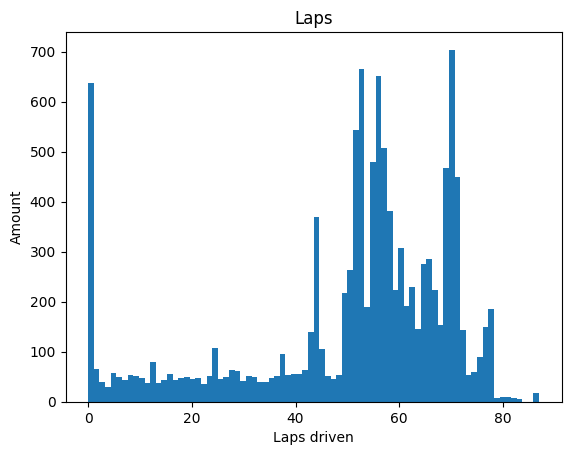

In [49]:
plt.hist(laps, bins=80)
plt.title("Laps")
plt.xlabel("Laps driven")
plt.ylabel("Amount")
plt.show()

## Boxplot

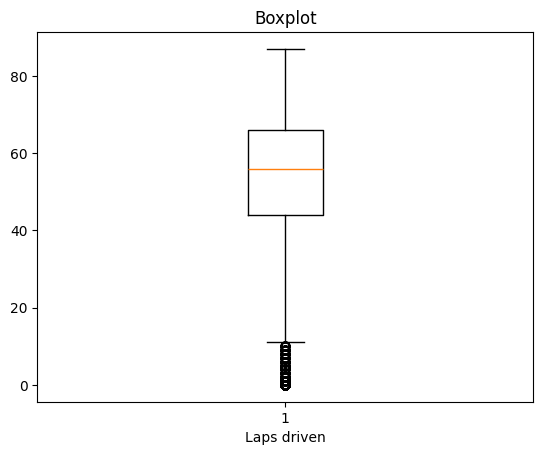

In [50]:
plt.boxplot(laps)
plt.title("Boxplot")
plt.xlabel("Laps driven")
plt.show()

## Vioplot

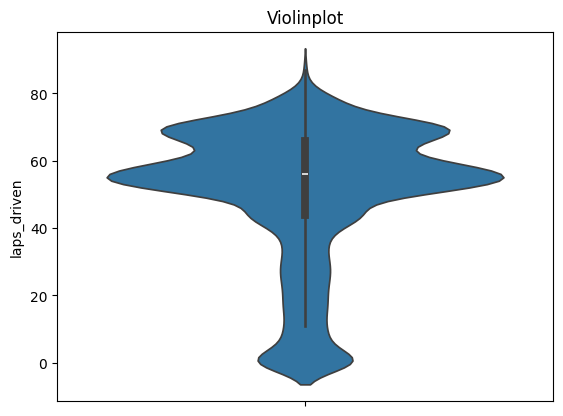

In [51]:
sns.violinplot(laps)
plt.title("Violinplot")
plt.show()

In [65]:
drivers = df["driver_name"]
print(drivers)

0           Lewis Hamilton
1            Nick Heidfeld
2             Nico Rosberg
3          Fernando Alonso
4        Heikki Kovalainen
               ...        
11674     Daniel Ricciardo
11675       Logan Sargeant
11676     Nico HĂĽlkenberg
11677         Carlos Sainz
11678        Oscar Piastri
Name: driver_name, Length: 11679, dtype: object


## Kierowcy z największa ilością wyścigów

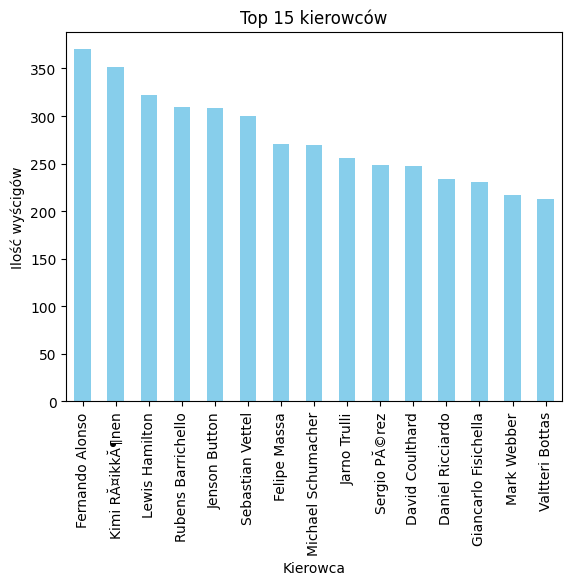

In [67]:
top_drivers = drivers.value_counts()[:15]
top_drivers.plot(kind='bar', color='skyblue')
plt.title('Top 15 kierowców')
plt.xlabel('Kierowca')
plt.ylabel('Ilość wyścigów')
plt.show()

## Najpopularniejsze przyczyny nieukończenia wyścigu (DNF)

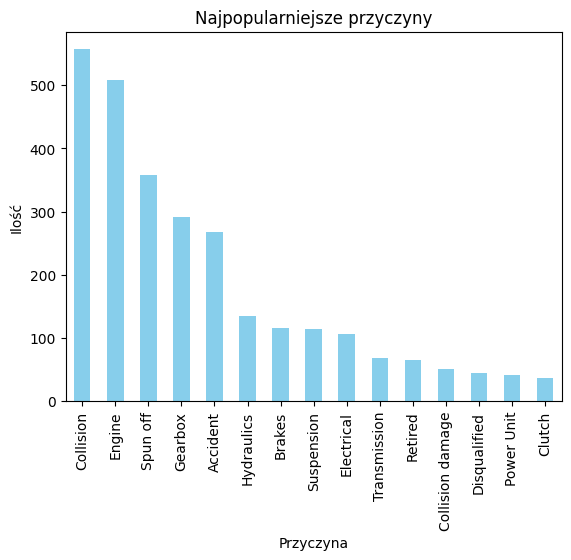

In [69]:
dnfs = df[~df["ending"].str.contains(r'\b(?:Lap|Laps|Finished|Did not qualify)\b', case=False, regex=True)]["ending"].value_counts()
dnfs[:15].plot(kind='bar', color='skyblue')
plt.title("Najpopularniejsze przyczyny")
plt.xlabel("Przyczyna")
plt.ylabel("Ilość")
plt.show()

## Analiza przyczyń nieukończenia wyścigu

    race_year  count
0        1994    249
1        1995    211
2        1996    178
3        1999    172
4        1997    170
5        2002    161
6        2001    157
7        2000    154
8        1998    153
9        2006    128
10       2010    118
11       2003    111
12       2007    103
13       2004    102
14       2005    100
15       2017     95
16       2012     91
17       2008     87
18       2014     86
19       2018     85
20       2016     84
21       2011     82
22       2015     81
23       2022     74
24       2009     70
25       2013     64
26       2019     60
27       2021     59
28       2020     57
29       2023     28


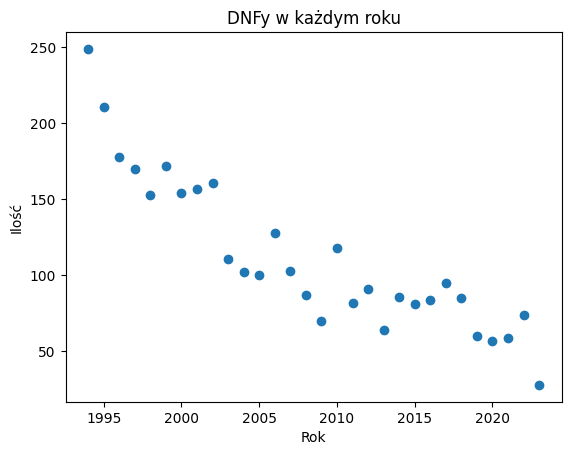

In [91]:
dnfs2 = df[~df["ending"].str.contains(r'\b(?:Lap|Laps|Finished)\b', case=False, regex=True)]['race_year']
grouped_dnfs = dnfs2.value_counts().reset_index(name='count')
print(grouped_dnfs)

plt.scatter(grouped_dnfs['race_year'], grouped_dnfs['count'])
plt.xlabel('Rok')
plt.ylabel('Ilość')
plt.title('DNFy w każdym roku')
plt.show()

### Regresja liniowa

In [100]:
def linear_regression(x_values, y_values):
    B = [x for x in range(1, 15000, 1000)]
    best_model_b = B[0]
    best_model_a = 0
    best_error = float("inf")
    learning_rate = 1e-7
    epochs = 50

    n = x_values.size
    for b in B:
        a = best_model_a
        for _ in range(epochs):
            dl_da = 0
            dl_db = 0
            for i in range(n):
                dl_da += (a * x_values[i] + b - y_values[i]) * x_values[i]
                dl_db += (a * x_values[i] + b - y_values[i])
            # gradient descent
            a -= 2/n * dl_da * learning_rate
            b -= 2/n * dl_db * learning_rate

        error = 0
        for i in range(x_values.size):
            error += (a * x_values[i] + b - y_values[i]) ** 2
        if error < best_error:
            best_error = error
            best_model_b = b
            best_model_a = a
    print(best_model_a, best_model_b)

    plt.scatter(x_values, y_values)
    plt.plot(list(range(1993, 2023)), [best_model_a * x + best_model_b for x in range(1993, 2023)], color="red")
    plt.show()

-5.421288333092641 11000.999752032703


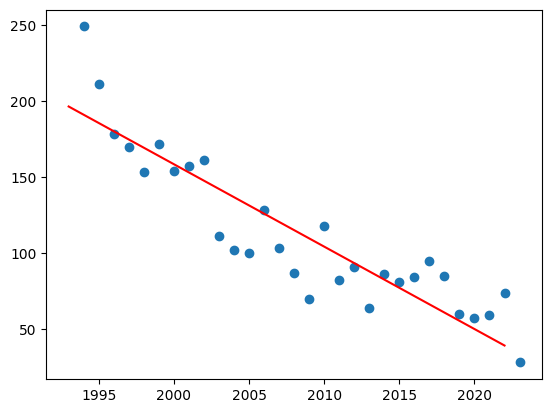

In [101]:
linear_regression(grouped_dnfs['race_year'], grouped_dnfs['count'])